#**Actividad 2 - Solución del Profesor**

###**Maestría en Inteligencia Artificial Aplicada**
###**Curso: Inteligencia Artificial y Aprendizaje Automático**
####**Tecnológico de Monterrey**
#####**Prof Luis Eduardo Falcón Morales**

###**Nombre del estudiante: Oscar Luis Guadarrama Jimenez**

###**Matrícula: A01796245**

**NOTAS:**

*   Esta actividad la puedes realizar en Google-Colab.
*   Se trabajará solamente con el archivo "california_housing_train.csv".
*   Si no trabajas con Google-Colab, deberás descargar el archivo y trabajarlo en el editor de tu preferencia.
*   Esta actividad consta solamente de 3 ejercicios, dividios en 3 partes.
*   **Solamente debes modificar este archivo agregando tus líneas de código en las partes que se te indican.**
*   **Cualquier modificación fuera de estas áreas te restará puntos a la actividad.**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

from sklearn.pipeline import Pipeline
from sklearn.model_selection import KFold
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import power_transform
from sklearn.preprocessing import FunctionTransformer

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression

In [ ]:
# Cargamos el archivo que está en la siguiente carpeta de Google-Colab:
DIR = "/content/sample_data/"
os.chdir(DIR)

misdatos = pd.read_csv("california_housing_train.csv", sep=",")
misdatos.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000
mean,-119.562108,35.625225,28.589353,2643.664412,539.410824,1429.573941,501.221941,3.883578,207300.912353
std,2.005166,2.137340,12.586937,2179.947071,421.499452,1147.852959,384.520841,1.908157,115983.764387
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.790000,33.930000,18.000000,1462.000000,297.000000,790.000000,282.000000,2.566375,119400.000000
50%,-118.490000,34.250000,29.000000,2127.000000,434.000000,1167.000000,409.000000,3.544600,180400.000000
75%,-118.000000,37.720000,37.000000,3151.250000,648.250000,1721.000000,605.250000,4.767000,265000.000000
max,-114.310000,41.950000,52.000000,37937.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


#**Ejercicio - 1: Matriz de Correlación de Pearson**

**PREGUNTAS:**

*   **Pregunta 1.1.** Investiga cuál es la importancia del coeficiente de correlación de Pearson y cómo puede utilizarse durante el análisis de los datos de un problema.

*   **Pregunta 1.2.** El coeficiente de correlación de Pearson, ¿para qué tipo de variables lo podemos aplicar?  

*   **Pregunta 1.3.** Despliega la matriz de correlación de las variables del dataframe "misdatos", incluyendo en cada celda de la matriz el valor numérico de la correlación entre cada par de variables. Al desplegar la matriz de correlación deberás además usar la opción del mapa de calor (heatmap) de la librería seaborn, usando el mapa de color 'BuGn'.

Puedes consultar la siguiente documentación:

https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.corr.html

https://seaborn.pydata.org/generated/seaborn.heatmap.html

https://matplotlib.org/stable/tutorials/colors/colormaps.html


### **Respuestas:**

++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

++++++++ Inicia sección para agregar texto ++++++++++++++++++++++++++


*   **Respuesta 1.1.**: El coeficiente de correlación de Pearson mide la relación lineal entre dos variables cuantitativas, con un rango de valores entre -1 y 1. Un valor cercano a 1 indica una correlación positiva fuerte, mientras que un valor cercano a -1 señala una correlación negativa fuerte. Este coeficiente es útil para identificar relaciones clave entre variables, lo que facilita el análisis predictivo y la toma de decisiones informada en distintos contextos.

*   **Respuesta 1.2.**:El coeficiente de Pearson es aplicable únicamente a variables cuantitativas que tengan una relación lineal. No se utiliza para variables cualitativas o categóricas.


++++++++ Termina sección para agregar texto ++++++++++++++++++++++++

+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

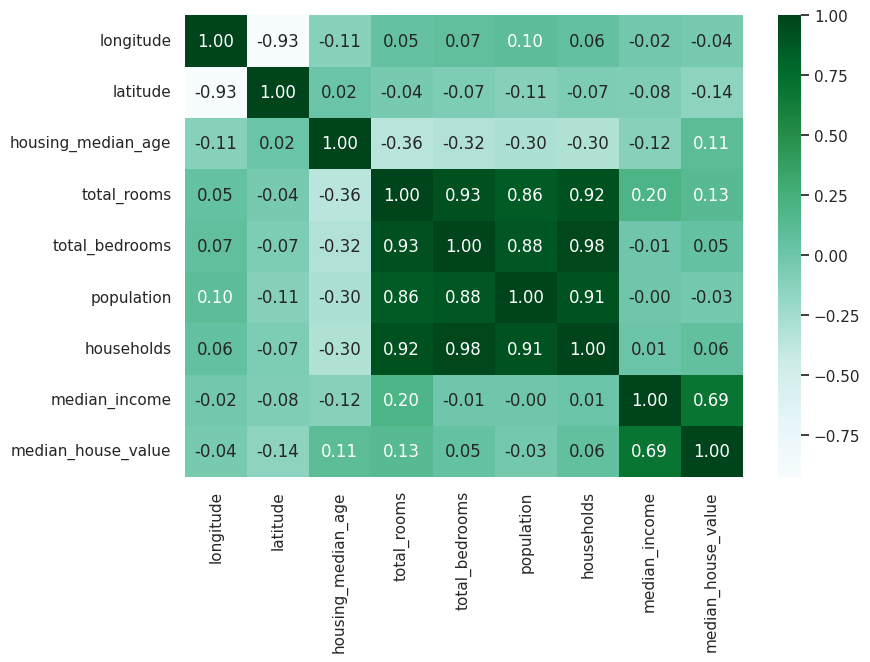

In [ ]:
sns.set(rc={'figure.figsize':(9,6)})

#########################################################################
# INICIA LA SECCIÓN PARA AGREGAR CÓDIGO.
# Respuesta 1.3.

# Sustituye "None" por tus líneas de código dentro de esta región.
# Se esperan cuando mucho 2 líneas de código.

sns.heatmap(misdatos.corr(), annot=True, fmt=".2f", cmap='BuGn')

# TERMINA LA SECCIÓN PARA AGREGAR CÓDIGO.
#########################################################################

plt.show()

#**Ejercicio - 2: Transformaciones e Histogramas de variables**

**INSTRUCCIONES:**

En este ejercicio se trabajará solamente con las siguientes 7 variables:

*   housing_median_age
*   total_rooms
*   total_bedrooms
*   population
*   households
*   median_income
*   median_house_value

A cada una de dichas variables les deberás aplicar las siguientes transformaciones y desplegar sus histogramas con 20 barras (bins):

*   Raíz cuadrada con Numpy.
*   Logaritmo natural con Numpy.
*   Potencia 2 (i.e., elevar al cuadrado) con Numpy.
*   Investiga y aplica Box-Cox con scikit-learn.


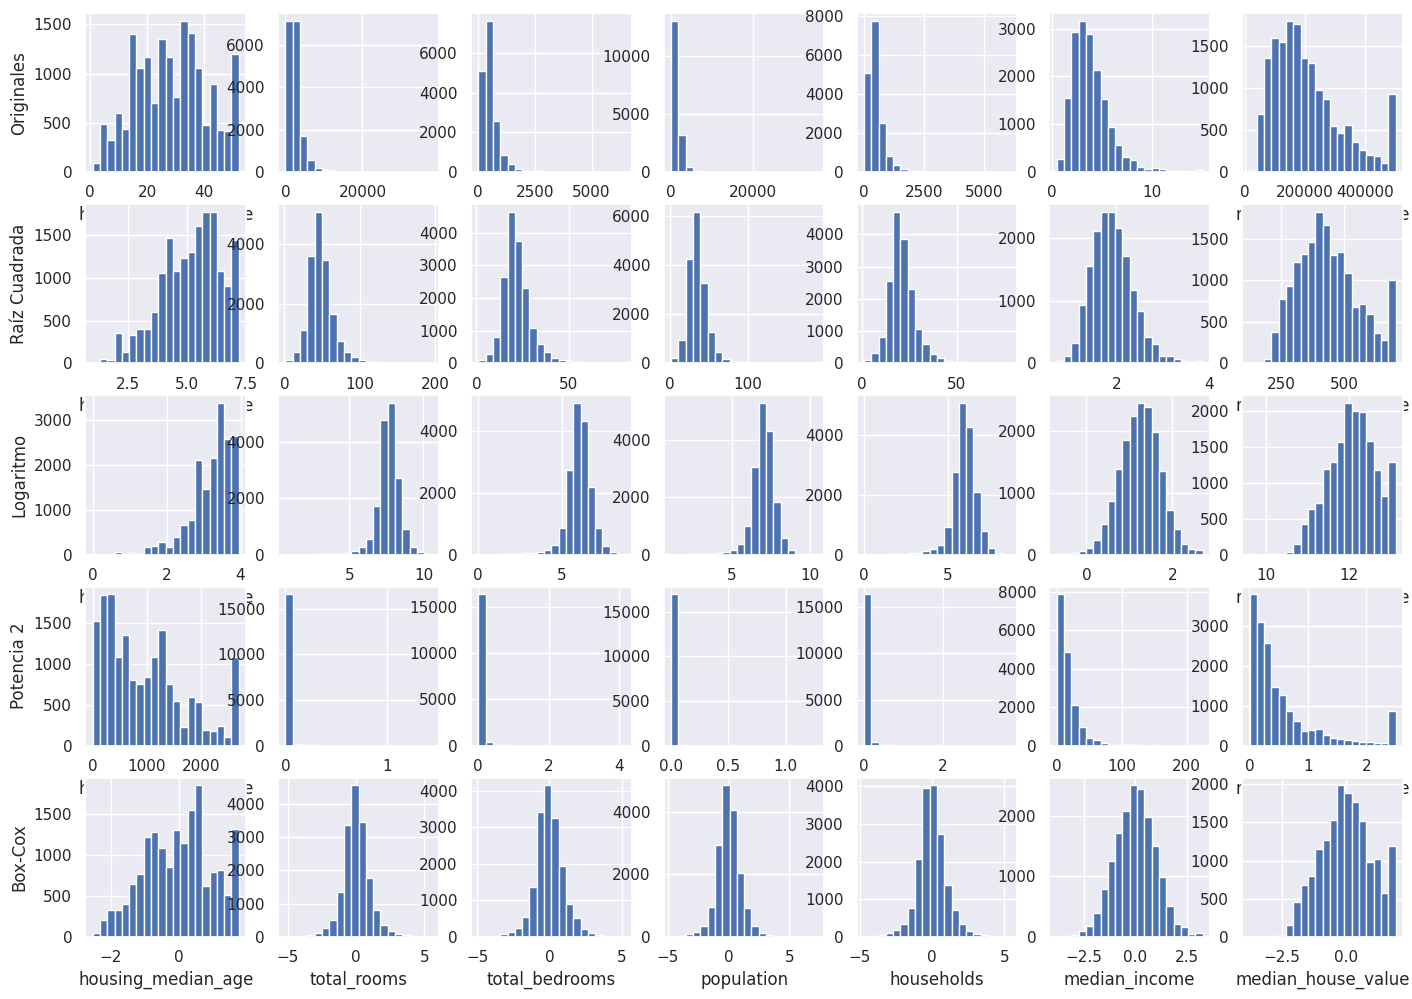

In [ ]:
# Lista de los nombres de las 7 variables que trabajaremos en este ejercicio.
variables_a_transformar = ['housing_median_age','total_rooms','total_bedrooms','population','households','median_income','median_house_value']


sns.set(rc={'figure.figsize':(17,12)})
fig, axes = plt.subplots(5, 7)

for k in range(0,7):

    ################################################################################################################
    # INICIA LA SECCIÓN PARA AGREGAR CÓDIGO.
    # Ejercicio 2
    # Solamente deberás escribir tu código en las partes que dicen "None", sustituyendo este por tu código.
    # Deberás utilizar el dataframe "misdatos" con la lista que llamamos "variables_a_transformar" para
    # seleccionar los valores de cada una de las 7 variables que se irán transformando y graficando.


    # Datos originales ---------------------------------------------------------
    plt.subplot(5,7,k+1)

    Transf0 = misdatos[variables_a_transformar[k]] #  En esta línea se debe asignar a Transf0 los valores de cada variable "k" sin transformar.

    plt.hist(Transf0,bins = 20)                    #  En este línea agrega el comando para obtener el histograma de Transf0 con 20 barras (bins).



    plt.xlabel(variables_a_transformar[k])
    if k==0:
      plt.ylabel('Originales')



    # Datos transformados con raíz cuadrada ------------------------------------
    plt.subplot(5,7,k+8)

    Transf1 = np.sqrt(Transf0) #  En esta línea se debe aplicar la raíz cuadrada a los valores de cada variable "k" sin transformar.

    plt.hist(Transf1,bins = 20)                       #  En este línea agrega el comando para obtener el histograma de Transf1 con 20 barras (bins).



    plt.xlabel(variables_a_transformar[k])
    if k==0:
      plt.ylabel('Raíz Cuadrada')



    # Datos transformados con logaritmo natural --------------------------------
    plt.subplot(5,7,k+15)

    Transf2 = np.log(Transf0)        #  En esta línea se debe aplicar el logaritmo natural a los valores de cada variable "k" sin transformar.

    plt.hist(Transf2,bins = 20)                   #  En este línea agrega el comando para obtener el histograma de Transf2 con 20 barras (bins).


    plt.xlabel(variables_a_transformar[k])
    if k==0:
      plt.ylabel('Logaritmo')



    # Datos transformados con la potencia de 2 ---------------------------------
    plt.subplot(5,7,k+22)

    Transf3 = np.square(Transf0)         #  En esta línea debes elevar al cuadrado los valores de cada variable "k" sin transformar.

    plt.hist(Transf3,bins = 20)                     #  En este línea agrega el comando para obtener el histograma de Transf3 con 20 barras (bins).



    plt.xlabel(variables_a_transformar[k])
    if k==0:
      plt.ylabel('Potencia 2')


    # Datos transformados con Box-Cox ------------------------------------------
    plt.subplot(5,7,k+29)

    Transf4 = power_transform(Transf0.values.reshape(-1, 1), method='box-cox')          #  En esta línea se debe aplicar la transformación Box-Cox a los valores de cada variable "k" sin transformar.

    plt.hist(Transf4,bins = 20)                    #  En este línea agrega el comando para obtener el histograma de Transf4 con 20 barras (bins).



    plt.xlabel(variables_a_transformar[k])
    if k==0:
      plt.ylabel('Box-Cox')

    # TERMINA LA SECCIÓN PARA AGREGAR CÓDIGO.
    ################################################################################################################



plt.show()

#**Ejercicio - 3 - Métricas de desempeño: $RMSE$, $MAE$ y $MAPE$**



**INSTRUCCIONES:**

En el archivo "MNA_IAyAA_semana_2_RLM_teoria_básica_2024.pdf" que se encuentra en Canvas se muestran las fórmulas que definen a las métricas $RMSE$, $MAE$ y $MAPE$.

Investiga el significado de cada una de ellas.

Cada una de ellas se puede calcular mediante los valores observados reales $y$, los valores de predicción $\hat{y}$ y el total de registros $n$.

En este ejercicio deberás definir cada una de estas métricas mediante tres funciones que llamarás mi_RMSE, mi_MAE y mi_MAPE.

Cada una de las tres funciones que definas deberán tener dos argumentos, a saber, los valores observados reales $y$ y los valores de predicción $\hat{y}$.

Como valor de retorno deberá ser el valor numérico real dado por la fórmula que lo define.

Solamente podrás usar las funciones de NumPy del promedio (mean), cuadrado (square) y valor absoluto (abs), además de las operaciones aritméticas básicas.

Para la definición de cada una de ellas se esperarían cuando mucho 5 líneas de código en total, pero pueden ser menos. Una cantidad mayor a esta será penalizada.


In [ ]:
#########################################################################
# INICIA LA SECCIÓN PARA AGREGAR CÓDIGO.
# Ejercicio 3

# Incluye aquí las líneas de código que definan a la función mi_RMSE:
def mi_RMSE(y_r, y_pred):
  return np.sqrt(np.mean((y_r-y_pred)**2))



# Incluye aquí las líneas de código que definan a la función mi_MAE:
def mi_MAE(y_r, y_pred):
  return np.mean(np.abs(y_r-y_pred))




# Incluye aquí las líneas de código que definan a la función mi_MAPE:
def mi_MAPE(y_r, y_pred):
  return np.mean(np.abs((y_r-y_pred)/y_r))*100



# TERMINA LA SECCIÓN PARA AGREGAR CÓDIGO.
#########################################################################



In [ ]:
Xtrain = misdatos.drop('median_house_value', axis='columns')
ytrain = misdatos['median_house_value']

num_prepro_pipeline = Pipeline(steps = [('imputar', SimpleImputer(strategy='median')),
                                        ('scalar', MinMaxScaler(feature_range=(1, 2))),
                                        ('sqrt', FunctionTransformer(np.sqrt))
                                        ])

numerical_features = ['total_rooms','total_bedrooms','population','households','median_income']

columnasTransformer = ColumnTransformer(transformers = [('numerical', num_prepro_pipeline, numerical_features)],
                                        remainder='passthrough')



modelo_LR = LinearRegression()

scores_RMSEVal = []
scores_MAEVal = []
scores_MAPEVal = []

kf = KFold(n_splits= 10, shuffle=True)

for train_index, val_index in kf.split(Xtrain):

  X_train, X_val = Xtrain.loc[train_index], Xtrain.loc[val_index]
  y_train, y_val = ytrain[train_index], ytrain[val_index]

  XtrainFit = columnasTransformer.fit(X_train)
  XtrainTransf = XtrainFit.transform(X_train)

  modelo_LR = modelo_LR.fit(XtrainTransf, y_train)


  XvalTransf = XtrainFit.transform(X_val)
  yhatVal = modelo_LR.predict(XvalTransf)

  scores_RMSEVal.append(mi_RMSE(y_val, yhatVal))
  scores_MAEVal.append(mi_MAE(y_val, yhatVal))
  scores_MAPEVal.append(mi_MAPE(y_val, yhatVal))


# Desplegar información:
results = [scores_RMSEVal, scores_MAEVal, scores_MAPEVal]
names = ['RMSEval','MAEval','MAPEval']

print("\t  %s\t\t%s   \t\t%s" % (names[0],names[1],names[2]))
for i,z in enumerate(zip(scores_RMSEVal, scores_MAEVal, scores_MAPEVal)):
  print("fold[%d]:  %.1f \t\t%.1f  \t\t%.1f%%" % (i+1,z[0],z[1],z[2]))
print("mean(std) %.1f(%.1f)  \t%.1f(%.1f)   \t%.1f%% (%.1f)" % (np.mean(scores_RMSEVal), np.std(scores_RMSEVal),
                                                                np.mean(scores_MAEVal), np.std(scores_MAEVal),
                                                                np.mean(scores_MAPEVal), np.std(scores_MAPEVal)))

	  RMSEval		MAEval   		MAPEval
fold[1]:  68289.6 		50528.1  		30.3%
fold[2]:  69585.2 		50430.9  		29.7%
fold[3]:  68474.8 		51120.8  		29.9%
fold[4]:  66720.6 		48691.9  		28.7%
fold[5]:  69278.0 		50280.1  		29.6%
fold[6]:  72037.6 		52174.1  		30.2%
fold[7]:  69866.4 		51239.6  		30.4%
fold[8]:  67469.7 		50042.7  		30.1%
fold[9]:  68526.5 		50781.2  		30.9%
fold[10]:  69813.6 		51598.5  		32.3%
mean(std) 69006.2(1400.0)  	50688.8(905.4)   	30.2% (0.9)


**\<\<Fin de la Actividad_1_Semana_2>>**